In [1]:
#importing libraries and files
import pandas as pd
import numpy as np
import re

query = 'dementia'
all_queries = pd.read_csv(r"C:\Users\Vanessa\Downloads\Dados\Programas\Repositório Git\DataVisualization_Dementia\DataVisualization_Dementia\DATASETS\NY times (dementia_alzheimer)\dementia_alzheimer.csv")

In [2]:
pip install matplotlib-venn --user

Note: you may need to restart the kernel to use updated packages.


In [3]:
all_queries['dementia_type'] = [[]]*len(all_queries)

In [4]:
# checking for other dementia-related termns in all_queries dataframe

# ‘mild cognitive impairment 15’
# ‘dementia’
# 'alzheimer'
# ‘vascular dementia’
# ‘frontotemporal dementia’
# ‘lewy body'

for term in ['alzheimer', 'vascular dementia', 'frontotemporal dementia', 'lewy body']:
    mask = (all_queries['headline1'].str.contains(f'{term}', flags = re.I) | all_queries['headline2'].str.contains(f'{term}', flags = re.I)| all_queries['snippet'].str.contains(f'{term}', flags = re.I) |all_queries['lead_paragraph'].str.contains(f'{term}', flags = re.I) | all_queries['keywords'].astype(str).str.contains(f'{term}', flags = re.I))
    all_queries.loc[mask, 'dementia_type'] = all_queries.loc[mask, 'dementia_type'].apply(lambda x: x + [term])


In [5]:
all_queries['dementia_type'].value_counts()

[alzheimer]                             2543
[]                                       647
[alzheimer, frontotemporal dementia]      12
[frontotemporal dementia]                  8
[lewy body]                                6
[vascular dementia]                        5
[alzheimer, vascular dementia]             5
[alzheimer, lewy body]                     1
Name: dementia_type, dtype: int64

In [6]:
all_queries = all_queries.explode('dementia_type')

In [7]:
all_queries.to_csv('dementia_subtype.csv', index = False)

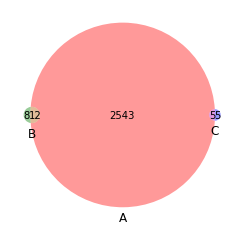

In [9]:
from matplotlib_venn import venn3
venn3(subsets = (2543, 8, 12, 5, 5, 0, 0))